## Generate predictions on the test data set

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, cohen_kappa_score
%matplotlib inline

class_names = ["A", "B", "None"]

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# the model must be in the models folder
model_to_use = "model-004-0.82.h5"

In [4]:
from keras.models import load_model
model = load_model('models/'+model_to_use)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [5]:
df = pd.read_csv("original_data/custdatabase.csv")
df_copy = pd.read_csv("original_data/custdatabase.csv")
print('Test dataset shape {0}, {1}'.format(df.shape[0], df.shape[1]))

Test dataset shape 4000, 10


In [6]:
# strip the spaces in the header, if present
df = df.rename(columns=lambda x: x.strip())
df.columns.values

array(['index', 'sex', 'mstatus', 'age', 'children', 'occupation',
       'education', 'income', 'avbal', 'avtrans'], dtype=object)

In [7]:
categorical_features = ["sex", "mstatus", "occupation", "education", "children"]
df[categorical_features].head()
df["children"] = df["children"].astype(str)
label_encoders = {}
label_mappings = {}
for categorical_feature in categorical_features:
    label_encoders[categorical_feature] = preprocessing.LabelEncoder()
    df[categorical_feature + "Num"] = label_encoders[categorical_feature].fit_transform(df[categorical_feature])
    label_mappings[categorical_feature] = label_encoders[categorical_feature].classes_

label_encoders = {}
label_mappings = {}
for categorical_feature in categorical_features:
    label_encoders[categorical_feature] = preprocessing.LabelEncoder()
    df[categorical_feature + "Num"] = label_encoders[categorical_feature].fit_transform(df[categorical_feature])
    label_mappings[categorical_feature] = label_encoders[categorical_feature].classes_

for categorical_feature in categorical_features:
    for class_value in label_mappings[categorical_feature]:
        df[categorical_feature + "_" + (class_value)] = df[categorical_feature] == np.array([(class_value)] * df.shape[0])
        df[categorical_feature + "_" + (class_value)] = df[categorical_feature + "_" + (class_value)].astype(int)

# drop the categorical values
df = df.drop(categorical_features, axis=1)

df.head()

,index,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,1001,44.27,10245.73,53183.04,4069.67,1,0,5,0,2,...,0,1,0,0,0,0,0,1,0,0
1,1002,61.90,1942.57,18100.78,1522.42,1,1,5,2,1,...,0,0,0,1,0,0,1,0,0,0
2,1003,37.30,9896.16,24496.82,2723.35,1,0,0,3,1,...,0,0,0,0,1,0,1,0,0,0
3,1004,25.02,10136.44,26690.01,4143.04,0,0,5,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1005,48.37,2521.11,13439.81,240.26,0,0,4,2,2,...,0,0,0,1,0,0,0,1,0,0


### Remove the "Num" columns only if required

In [8]:
# remove num columns for Neural networks
shouldRemoveNumColumns = True

In [9]:
if shouldRemoveNumColumns:
    num_columns = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
    df = df.drop(num_columns, axis=1)
else:
    print("Not dropping the num columns")
df.head()

,index,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,1001,44.27,10245.73,53183.04,4069.67,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1002,61.90,1942.57,18100.78,1522.42,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1003,37.30,9896.16,24496.82,2723.35,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1004,25.02,10136.44,26690.01,4143.04,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1005,48.37,2521.11,13439.81,240.26,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## Get the normalizers based on the train data

In [10]:
train_df = pd.read_csv("working_data/trial_promo_training.csv")
features_to_scale = ["age", "income", "avbal", "avtrans"]
min_max_scaler = preprocessing.MinMaxScaler()

# fit on the train data
train_df[features_to_scale] = min_max_scaler.fit(train_df[features_to_scale])

# transform the test data
df[features_to_scale] = min_max_scaler.transform(df[features_to_scale])
df.head()

,index,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,1001,0.378355,0.510499,0.711262,0.527639,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1002,0.632756,0.081311,0.234776,0.193628,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1003,0.277778,0.492430,0.321646,0.351101,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1004,0.100577,0.504850,0.351434,0.537259,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1005,0.437518,0.111215,0.171470,0.025504,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [11]:
customer_ids = df["index"]
df = df.drop("index", axis=1)
df.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.378355,0.510499,0.711262,0.527639,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.632756,0.081311,0.234776,0.193628,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.277778,0.492430,0.321646,0.351101,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.100577,0.504850,0.351434,0.537259,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.437518,0.111215,0.171470,0.025504,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [12]:
df.columns

Index(['age', 'income', 'avbal', 'avtrans', 'sex_F', 'sex_M',
       'mstatus_divorced', 'mstatus_married', 'mstatus_single',
       'mstatus_widowed', 'occupation_IT', 'occupation_construct',
       'occupation_education', 'occupation_finance', 'occupation_government',
       'occupation_legal', 'occupation_manuf', 'occupation_medicine',
       'occupation_retired', 'education_postgrad', 'education_professional',
       'education_secondary', 'education_tertiary', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4'],
      dtype='object')

## Perform the predictions using the model

In [13]:
model_predictions = model.predict(df)
print("Num predictions: {0}".format(len(model_predictions)))
model_predictions = np.argmax(model_predictions, axis=1)
df_copy["status"] = model_predictions
df_copy["status"] = df_copy["status"].astype(int)
df_copy["status"].head()

Num predictions: 4000


0    2
1    2
2    2
3    1
4    2
Name: status, dtype: int64

In [14]:
df_copy["status"] = df_copy["status"].replace(0, "A").replace(1, "B").replace(2, "None")
df_copy.head()

,index,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status
0,1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67,None
1,1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42,None
2,1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35,None
3,1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,B
4,1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26,None


In [15]:
df_copy.to_csv("working_data/all_customer_predictions.csv", index=False)

# Validate prediction performance

In [16]:
test_df = pd.read_csv("original_data/cust_actual_merged.csv")
test_df.head(5)

,index,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,score
0,1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67,None,5.2
1,1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42,None,2.5
2,1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35,None,4.1
3,1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,None,4.4
4,1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26,None,2.3


In [17]:
# strip the spaces in the header, if present
test_df = test_df.rename(columns=lambda x: x.strip())
test_df.columns.values

array(['index', 'sex', 'mstatus', 'age', 'children', 'occupation',
       'education', 'income', 'avbal', 'avtrans', 'status', 'score'],
      dtype=object)

In [18]:
categorical_features = ["sex", "mstatus", "occupation", "education", "children"]
test_df[categorical_features].head()
test_df["children"] = test_df["children"].astype(str)
label_encoders = {}
label_mappings = {}
for categorical_feature in categorical_features:
    label_encoders[categorical_feature] = preprocessing.LabelEncoder()
    df[categorical_feature + "Num"] = label_encoders[categorical_feature].fit_transform(test_df[categorical_feature])
    label_mappings[categorical_feature] = label_encoders[categorical_feature].classes_

label_encoders = {}
label_mappings = {}
for categorical_feature in categorical_features:
    label_encoders[categorical_feature] = preprocessing.LabelEncoder()
    test_df[categorical_feature + "Num"] = label_encoders[categorical_feature].fit_transform(test_df[categorical_feature])
    label_mappings[categorical_feature] = label_encoders[categorical_feature].classes_

for categorical_feature in categorical_features:
    for class_value in label_mappings[categorical_feature]:
        test_df[categorical_feature + "_" + (class_value)] = test_df[categorical_feature] == np.array([(class_value)] * test_df.shape[0])
        test_df[categorical_feature + "_" + (class_value)] = test_df[categorical_feature + "_" + (class_value)].astype(int)

# drop the categorical values
test_df = test_df.drop(categorical_features, axis=1)

test_df.head()

,index,age,income,avbal,avtrans,status,score,sexNum,mstatusNum,occupationNum,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,1001,44.27,10245.73,53183.04,4069.67,None,5.2,1,0,5,...,0,1,0,0,0,0,0,1,0,0
1,1002,61.90,1942.57,18100.78,1522.42,None,2.5,1,1,5,...,0,0,0,1,0,0,1,0,0,0
2,1003,37.30,9896.16,24496.82,2723.35,None,4.1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1004,25.02,10136.44,26690.01,4143.04,None,4.4,0,0,5,...,0,1,0,0,0,0,1,0,0,0
4,1005,48.37,2521.11,13439.81,240.26,None,2.3,0,0,4,...,0,0,0,1,0,0,0,1,0,0


In [19]:
# remove num columns for Neural networks
shouldRemoveNumColumns = True

if shouldRemoveNumColumns:
    num_columns = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
    test_df = test_df.drop(num_columns, axis=1)
else:
    print("Not dropping the num columns")

customer_ids = test_df["index"]
test_df = test_df.drop("index", axis=1)
test_df.head()

,age,income,avbal,avtrans,status,score,sex_F,sex_M,mstatus_divorced,mstatus_married,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,44.27,10245.73,53183.04,4069.67,None,5.2,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,61.90,1942.57,18100.78,1522.42,None,2.5,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,37.30,9896.16,24496.82,2723.35,None,4.1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,25.02,10136.44,26690.01,4143.04,None,4.4,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,48.37,2521.11,13439.81,240.26,None,2.3,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [20]:
test_df.columns

Index(['age', 'income', 'avbal', 'avtrans', 'status', 'score', 'sex_F',
       'sex_M', 'mstatus_divorced', 'mstatus_married', 'mstatus_single',
       'mstatus_widowed', 'occupation_IT', 'occupation_construct',
       'occupation_education', 'occupation_finance', 'occupation_government',
       'occupation_legal', 'occupation_manuf', 'occupation_medicine',
       'occupation_retired', 'education_postgrad', 'education_professional',
       'education_secondary', 'education_tertiary', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4'],
      dtype='object')

In [21]:
train_df = pd.read_csv("working_data/trial_promo_training.csv")
features_to_scale = ["age", "income", "avbal", "avtrans"]
min_max_scaler = preprocessing.MinMaxScaler()

# fit on the train data
train_df[features_to_scale] = min_max_scaler.fit(train_df[features_to_scale])

# transform the test data
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

,age,income,avbal,avtrans,status,score,sex_F,sex_M,mstatus_divorced,mstatus_married,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.378355,0.510499,0.711262,0.527639,None,5.2,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0.632756,0.081311,0.234776,0.193628,None,2.5,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0.277778,0.492430,0.321646,0.351101,None,4.1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0.100577,0.504850,0.351434,0.537259,None,4.4,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0.437518,0.111215,0.171470,0.025504,None,2.3,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
test_df = test_df.drop(["score"], axis=1)
test_df["status"] = test_df["status"].replace(0, "A").replace(1, "B").replace(2, "None")
test_df.head()

,age,income,avbal,avtrans,status,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.378355,0.510499,0.711262,0.527639,None,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.632756,0.081311,0.234776,0.193628,None,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0.277778,0.492430,0.321646,0.351101,None,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.100577,0.504850,0.351434,0.537259,None,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.437518,0.111215,0.171470,0.025504,None,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [23]:
X_test = test_df.loc[:,test_df.columns != "status"]
y_test = test_df["status"].replace("A", 0).replace("B", 1).replace("None", 2)

In [24]:
y_test_pred = model.predict(X_test)
print("Num predictions: {0}".format(len(y_test_pred)))
y_test_pred = np.argmax(y_test_pred, axis=1)

Num predictions: 4000


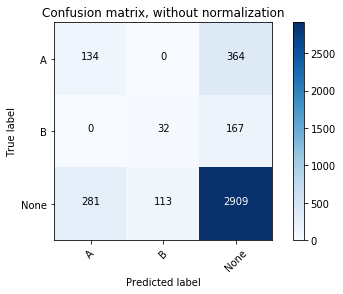

In [25]:
cnf_matrix_grad = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_grad, classes=class_names,
                      title='Confusion matrix, without normalization')

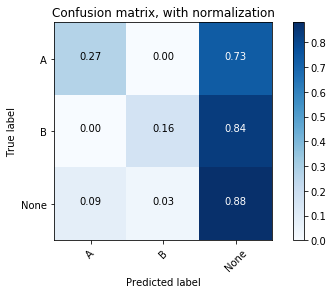

In [26]:
plot_confusion_matrix(cnf_matrix_grad, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')

In [27]:
print("test accuracy:", accuracy_score(y_test, y_test_pred))
print("kappa score:", cohen_kappa_score(y_test, y_test_pred))

test accuracy: 0.76875
kappa score: 0.15950256181347544


In [28]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[0,1,2])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=class_names)
score_df

,precision,recall,f1-score,support
A,0.3229,0.2691,0.2935,498
B,0.2207,0.1608,0.1860,199
None,0.8456,0.8807,0.8628,3303
